# HEP Plotter Gallery (2D)
Below are a collection of simple examples that demonstrate the capabilities of hepPlotter.  
This package is only meant to improve style and reduce time needed to make publication quality figures for HEP.  
Where possible, the API for matplotlib is used directly (the default options are modified to better suit HEP plots).  However, the user should still retain enough control to modify plots as needed.

First, ensure the environment has the proper path for this setup.   Nominally this would be used inside a CMSSW environment, so the import statements will vary.

In [1]:
import os
import sys

In [2]:
cwd = os.getcwd()
hpd = cwd.rstrip("/examples")+"/python/"
if hpd not in sys.path:
    sys.path.insert(0,hpd)
    print("Added {0} to path!".format(hpd))
else:
    print("Already exists in path!")

Added /Users/demarley/Desktop/CERN/CMS/common/hepPlotter/python/ to path!


## Two dimensional Histograms
HEP plotter is designed to accept ROOT histograms (TH1 or TEfficiency) and then plot in a HEP-friendly format using matplotlib.  It is also possible to pass un-binned data directly (e.g., a numpy array) and a unique histogram will be generated.  However, by using histograms directly, HEP users can manipulate histograms using familiar analysis techniques before plotting them.

In [3]:
from histogram2D import Histogram2D
import tools as tools

%matplotlib inline

Welcome to JupyROOT 6.10/02


/Users/demarley/anaconda2/lib/python2.7/site-packages/matplotlib/style/core.py:51: UserWarning: Style includes a parameter, 'backend', that is not related to style.  Ignoring
  "to style.  Ignoring".format(key))


We will now load toy data (example.root) and show some basic plots that you can make using this framework.

In [4]:
import ROOT
# uproot integration is on-going

In [5]:
f = ROOT.TFile.Open("example.root")

In [6]:
th2_data = f.Get("th2")   # standard ROOT histogram (TH2D)

In these examples we want to demonstrate the following features:

- colormap
- colorbar
- write bin yields/errors

First, let's make a basic plot showing the two-dimensional histogram

/Users/demarley/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


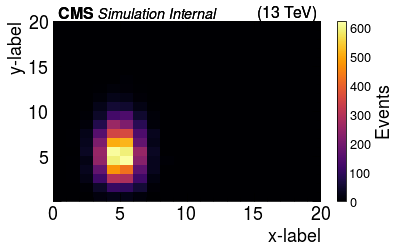

In [7]:
# Setup the plot (define some global settings)
hist = Histogram2D()

hist.normed  = False
hist.x_label = "x-label"
hist.y_label = "y-label"
hist.saveAs  = "hist2d_jupyter_example"
hist.CMSlabel = 'outer'
hist.CMSlabelStatus = "Simulation Internal"
hist.logplot['data'] = False

# Set properties unique to 2D histogram
hist.colormap = 'default'          # options are defined in `setColormap()` of histogram2D.py
hist.colorbar['title'] = "Events"  # text label for colorbar

hist.initialize()   # sets the parameters of the plot

# Add TH2 data to the plot from sample1
hist.Add(th2_data,name="th2")

p = hist.execute() # make the plot (p represents the matplotlib 'figure' object)
#hist.savefig()     # save the figure (with name "hist.saveAs+hist.format") and close it

We can also modify the structure of the plot by rebinning the contents.  
To do this, we need to load the `array` module.

_NB: It is possible to change the limits of the plot, but there seems to be issues with the frame of the figure if the limits go lower than the histogram -- feel free to try this yourself by modifying `hist.xlim`._

In [8]:
from array import array

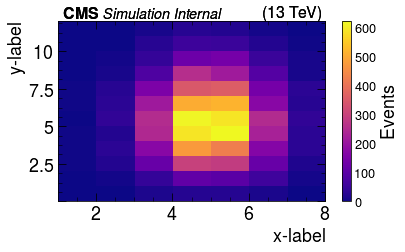

In [9]:
# Setup the plot (define some global settings)
hist = Histogram2D()

hist.normed  = False
hist.rebin   = {'x':array('d',range(1,9)),'y':array('d',range(13))}
hist.x_label = "x-label"
hist.y_label = "y-label"
hist.saveAs  = "hist2d_jupyter_example"
hist.CMSlabel = 'outer'
hist.CMSlabelStatus = "Simulation Internal"
hist.logplot['data'] = False

# Set properties unique to 2D histogram
hist.colormap = 'default'          # options are defined in `setColormap()` of histogram2D.py
hist.colorbar['title'] = "Events"  # text label for colorbar

hist.initialize()   # sets the parameters of the plot

# Add TH2 data to the plot from sample1
hist.Add(th2_data,name="th2")

p = hist.execute() # make the plot (p represents the matplotlib 'figure' object)
#hist.savefig()     # save the figure (with name "hist.saveAs+hist.format") and close it